## **WORKSHOP 002 - NOTEBOOK #3: Grammys - Exploratory Data Analysis (EDA)**
Developed by [Sebastian Belalcazar](https://github.com/SEBASBELMOS)

### **Setting Environment**

In [1]:
import os 
print(os.getcwd())

try:
    os.chdir("../../workshop-002")

except FileNotFoundError:
    print("""
        FileNotFoundError - The directory may not exist or you might not be in the specified path.
        If this has already worked, do not run this block again, as the current directory is already set to project_etl.
        """)
    
print(os.getcwd())

d:\U\FIFTH SEMESTER\ETL\workshop-002\notebooks
d:\U\FIFTH SEMESTER\ETL\workshop-002


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from src.database.db_operations import create_gcp_engine, dispose_engine
import re
from collections import Counter
plt.style.use("ggplot")

### **Read Data**

In [3]:
engine = create_gcp_engine()

INFO:root:Database engine created successfully.


In [4]:
grammys_data = pd.read_sql_table("grammy_awards", engine, schema="raw")
grammys_data.head()

dispose_engine(engine)

INFO:root:Database engine disposed successfully.


### **Data Preprocessing and Cleansing**

The Grammy dataset contains a total of _4.810_ entries with _10_ columns.

**String columns (object type):**

- `title`: Title of the Grammy nomination.
- `published_at`: Date the nomination was published.
- `updated_at`: Date the nomination was last updated.
- `category`: The Grammy category.
- `nominee`: The person or group nominated.
- `artist`: The artist involved (if applicable).
- `workers`: People involved in the production.
- `img`: URL for an image related to the nomination.


**Numerical columns (int64 type):**

- `year`: The year of the Grammy nomination.

**Boolean column (bool type):**

- `winner`: Indicates if the nominee won the Grammy.

In [5]:
df = grammys_data.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          4810 non-null   int64 
 1   title         4810 non-null   object
 2   published_at  4810 non-null   object
 3   updated_at    4810 non-null   object
 4   category      4810 non-null   object
 5   nominee       4804 non-null   object
 6   artist        2970 non-null   object
 7   workers       2620 non-null   object
 8   img           3443 non-null   object
 9   winner        4810 non-null   bool  
dtypes: bool(1), int64(1), object(8)
memory usage: 343.0+ KB


#### **Null Values Summarise**

In [7]:
df.nunique()

year              62
title             62
published_at       4
updated_at        10
category         638
nominee         4131
artist          1658
workers         2366
img             1463
winner             1
dtype: int64

In [8]:
df.isnull().sum()

year               0
title              0
published_at       0
updated_at         0
category           0
nominee            6
artist          1840
workers         2190
img             1367
winner             0
dtype: int64

#### **Drop Columns**

##### **`img` Column (Image)**

In [9]:
df.loc[0, "img"]

'https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Billie%2BEilish/Billie%2520Eilish_1_1_1594138954.jpg?itok=3-71Dfxh'

##### **`winner` Column**

In [10]:
df["winner"].value_counts()

winner
True    4810
Name: count, dtype: int64

In [11]:
df.rename(columns={"winner": "is_winner"}, inplace=True)

##### **`updated_at` Column**

In [12]:
df["updated_at"].value_counts()

updated_at
2019-09-10T01:08:19-07:00    778
2019-09-10T01:06:11-07:00    754
2019-09-10T01:07:37-07:00    713
2019-09-10T01:06:59-07:00    681
2019-09-10T01:11:09-07:00    658
2019-09-10T01:09:02-07:00    554
2020-05-19T05:10:28-07:00    433
2017-11-28T00:03:45-08:00    108
2020-09-01T12:16:40-07:00     83
2019-09-10T01:11:48-07:00     48
Name: count, dtype: int64

##### **`published_at` Column**

In [13]:
df['published_at'].value_counts()

published_at
2017-11-28T00:03:45-08:00    4205
2020-05-19T05:10:28-07:00     433
2018-12-06T23:48:49-08:00      86
2018-05-22T03:08:24-07:00      86
Name: count, dtype: int64

##### **Drop unnecessary columns**

In [14]:
df = df.drop(columns=["img", "updated_at", "published_at"])

In [15]:
df.head()

,year,title,category,nominee,artist,workers,is_winner
0,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",True
1,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",True
2,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",True
3,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",True
4,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",True


#### **Null Values**

##### **`nominee`**

In [16]:
df.loc[df["nominee"].isna()]

,year,title,category,nominee,artist,workers,is_winner
2274,2000,43rd Annual GRAMMY Awards (2000),"Remixer of the Year, Non-Classical",None,None,None,True
2372,1999,42nd Annual GRAMMY Awards (1999),"Remixer Of The Year, Non-Classical",None,None,None,True
2464,1998,41st Annual GRAMMY Awards (1998),"Remixer Of The Year, Non-classical",None,None,None,True
2560,1997,40th Annual GRAMMY Awards (1997),"Remixer Of The Year, Non-Classical",None,None,None,True
4527,1965,8th Annual GRAMMY Awards (1965),Best New Country & Western Artist,None,None,None,True
4574,1964,7th Annual GRAMMY Awards (1964),Best New Country & Western Artist Of 1964,None,None,None,True


In [17]:
df = df.dropna(subset=["nominee"])
df.loc[df["nominee"].isna()]

,year,title,category,nominee,artist,workers,is_winner


##### **`artist` and `workers`**

In [18]:
na_values = df.loc[(df["artist"].isna()) & (df["workers"].isna())]
na_values.head()

,year,title,category,nominee,artist,workers,is_winner
24,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Billie Eilish,None,None,True
25,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Black Pumas,None,None,True
26,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Lil Nas X,None,None,True
27,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Lizzo,None,None,True
28,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Maggie Rogers,None,None,True


##### **`category`**

In [19]:
na_values['category'].value_counts()

category
Best New Artist                                                                              50
Producer Of The Year, Non-Classical                                                          22
Producer Of The Year, Classical                                                              22
Classical Producer Of The Year                                                               18
Producer Of The Year (Non-Classical)                                                         10
Producer Of The Year                                                                         10
Best New Artist Of The Year                                                                   9
Best Classical Vocal Soloist Performance                                                      7
Best Classical Vocal Performance                                                              4
Best Small Ensemble Performance (With Or Without Conductor)                                   4
Best Classical Performance - In

In [20]:
categories = [
    "Best Classical Vocal Soloist Performance",
    "Best Classical Vocal Performance",
    "Best Small Ensemble Performance (With Or Without Conductor)",
    "Best Classical Performance - Instrumental Soloist Or Soloists (With Or Without Orchestra)",
    "Most Promising New Classical Recording Artist",
    "Best Classical Performance - Vocal Soloist (With Or Without Orchestra)",
    "Best New Classical Artist",
    "Best Classical Vocal Soloist",
    "Best Performance - Instrumental Soloist Or Soloists (With Or Without Orchestra)",
    "Best Classical Performance - Vocal Soloist"
]

na_filtered_values = na_values[na_values["category"].isin(categories)]
na_filtered_values.head()

,year,title,category,nominee,artist,workers,is_winner
2382,1999,42nd Annual GRAMMY Awards (1999),Best Small Ensemble Performance (With Or Witho...,"Colors Of Love - Works Of Thomas, Stucky, Tave...",None,None,True
2475,1998,41st Annual GRAMMY Awards (1998),Best Small Ensemble Performance (With Or Witho...,Reich: Music For 18 Musicians,None,None,True
2570,1997,40th Annual GRAMMY Awards (1997),Best Small Ensemble Performance (With Or Witho...,"Hindemith: Kammermusik No. 1 With Finale 1921,...",None,None,True
2571,1997,40th Annual GRAMMY Awards (1997),Best Classical Vocal Performance,"An Italian Songbook - Works Of Bellini, Donize...",None,None,True
2658,1996,39th Annual GRAMMY Awards (1996),Best Small Ensemble Performance (With Or Witho...,Boulez: ...Explosante-Fixe...,None,None,True


In [21]:
na_values = na_values.drop(na_filtered_values.index, axis=0)
df = df.drop(na_filtered_values.index, axis=0)

In [22]:
df.shape

(4776, 7)

##### **`nominee` & `artist`**

In [23]:
df.loc[na_values.index, 'artist'] = na_values['nominee']

In [24]:
df.loc[df['artist'].isna() & df['workers'].isna()]

,year,title,category,nominee,artist,workers,is_winner


In [25]:
null_artist = df.loc[df['artist'].isna()]
null_artist.shape

(1654, 7)

In [26]:
sample_null_artist = null_artist.head()
sample_null_artist

,year,title,category,nominee,artist,workers,is_winner
16,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Bad Guy,None,"Billie Eilish O'Connell & Finneas O'Connell, s...",True
17,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Always Remember Us This Way,None,"Natalie Hemby, Lady Gaga, Hillary Lindsey & Lo...",True
18,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Bring My Flowers Now,None,"Brandi Carlile, Phil Hanseroth, Tim Hanseroth ...",True
19,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Hard Place,None,"Ruby Amanfu, Sam Ashworth, D. Arcelious Harris...",True
20,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Lover,None,"Taylor Swift, songwriter (Taylor Swift)",True


In [27]:
for x in sample_null_artist.index:
    print(sample_null_artist.loc[x, 'workers'])


Billie Eilish O'Connell & Finneas O'Connell, songwriters (Billie Eilish)
Natalie Hemby, Lady Gaga, Hillary Lindsey & Lori McKenna, songwriters (Lady Gaga)
Brandi Carlile, Phil Hanseroth, Tim Hanseroth & Tanya Tucker, songwriters (Tanya Tucker)
Ruby Amanfu, Sam Ashworth, D. Arcelious Harris, H.E.R. & Rodney Jerkins, songwriters (H.E.R.)
Taylor Swift, songwriter (Taylor Swift)


In [28]:
def extract_artist(workers):
    if pd.isna(workers):
        return None
    match = re.search(r'\((.*?)\)', workers)
    return match.group(1) if match else None

mask = df['artist'].isna() & df['workers'].notna()
df.loc[mask, 'artist'] = df.loc[mask, 'workers'].apply(extract_artist)

In [29]:
df.iloc[16:21]

,year,title,category,nominee,artist,workers,is_winner
16,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Bad Guy,Billie Eilish,"Billie Eilish O'Connell & Finneas O'Connell, s...",True
17,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Always Remember Us This Way,Lady Gaga,"Natalie Hemby, Lady Gaga, Hillary Lindsey & Lo...",True
18,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Bring My Flowers Now,Tanya Tucker,"Brandi Carlile, Phil Hanseroth, Tim Hanseroth ...",True
19,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Hard Place,H.E.R.,"Ruby Amanfu, Sam Ashworth, D. Arcelious Harris...",True
20,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Lover,Taylor Swift,"Taylor Swift, songwriter (Taylor Swift)",True


In [30]:
df.isna().sum()

year            0
title           0
category        0
nominee         0
artist        288
workers      2156
is_winner       0
dtype: int64

We can noticed numerous `artists` appearing in the `workers` column. Upon further examination, we can observe several patterns in this column that can help us identify the artists:

- The name appears on its own or is accompanied by a _Featuring_, which should also be included.

- The name is separated by a semicolon (`;`) and either stands alone or is accompanied by a _Featuring_ that should also be included.

- The artist is followed by a comma (`,`) and a role designation (`artist` or `artists`, `composer`, `conductor`, `choir director`, `chorus master`, `ensembles`, `soloist` or `soloists`, `conductor/soloist`).

In [31]:
artist_null = df[df['artist'].isna()]
artist_null.head()

,year,title,category,nominee,artist,workers,is_winner
163,2015,58th Annual GRAMMY Awards (2015),Best Contemporary Classical Composition,Paulus: Prayers & Remembrances,None,"Stephen Paulus, composer",True
164,2019,62nd Annual GRAMMY Awards (2019),Best Improvised Jazz Solo,Sozinho,None,"Randy Brecker, soloist",True
165,2019,62nd Annual GRAMMY Awards (2019),Best Improvised Jazz Solo,Elsewhere,None,"Melissa Aldana, soloist",True
166,2019,62nd Annual GRAMMY Awards (2019),Best Improvised Jazz Solo,Tomorrow Is The Question,None,"Julian Lage, soloist",True
167,2019,62nd Annual GRAMMY Awards (2019),Best Improvised Jazz Solo,The Windup,None,"Branford Marsalis, soloist",True


In [32]:
artist_index = artist_null.index

##### **Roles of Interest**

In [33]:
roles_flat = [
    role.strip()
    for worker in artist_null["workers"].dropna()
    for role in re.split(r'[;,]', worker)[1:]
    if role.strip()
]

role_counts = Counter(roles_flat)

role_counts.most_common()

[('artist', 80),
 ('producer', 73),
 ('soloist', 63),
 ('composer', 45),
 ('artists', 34),
 ('conductor', 27),
 ('engineer', 19),
 ('songwriters', 13),
 ('engineer/mixer', 10),
 ('producers', 9),
 ('Andreas Neubronner', 6),
 ('Tim Handley', 5),
 ('ensembles', 5),
 ('James Mallinson', 5),
 ('Thomas Frost', 4),
 ('Kirk Franklin', 3),
 ('songwriter', 3),
 ('soloists', 3),
 ('Karl-August Naegler', 3),
 ('Jonathan Allen', 2),
 ('John Newton', 2),
 ('engineers/mixers', 2),
 ('Christopher Alder', 2),
 ('Judith Sherman', 2),
 ('Adam Abeshouse', 2),
 ('Michelle DeYoung', 2),
 ('Hans Weber', 2),
 ('Robert Woods', 2),
 ('Lynn Harrell & Itzhak Perlman', 2),
 ('Artur Rubinstein & Henryk Szeryng', 2),
 ('David Harvey', 2),
 ('Thomas Z. Shepard', 2),
 ('Gregor Piatigorsky & William Primrose', 2),
 ('Bryan Fowler', 1),
 ('Gloria Gaynor & Chris Stevens', 1),
 ('Tony Brown', 1),
 ('Brandon Lake', 1),
 ('Tasha Cobbs Leonard & Nate Moore', 1),
 ('Josh Kerr', 1),
 ('Jordan Reynolds', 1),
 ('Joel Smallbone'

In [34]:
roles_interest = [
    "artist",
    "artists",
    "composer",
    "conductor",
    "choir director",
    "chorus master",
    "ensembles",
    "soloist",
    "soloists",
    "conductor/soloist",
    "graphic designer"
]

##### **Solo Artist with Featuring**

In [35]:
def send_workers_to_artist(row):
    if pd.isna(row['artist']):
        workers = row['workers']
        if not re.search(r'[;,]', workers):
            return workers
    return row['artist']

df['artist'] = df.apply(send_workers_to_artist, axis=1)

In [36]:
new_artist = df.loc[artist_index]
new_artist.loc[[192, 193, 402, 403]]

,year,title,category,nominee,artist,workers,is_winner
192,2019,62nd Annual GRAMMY Awards (2019),Best Gospel Performance/Song,See The Light,Travis Greene Featuring Jekalyn Carr,Travis Greene Featuring Jekalyn Carr,True
193,2019,62nd Annual GRAMMY Awards (2019),Best Gospel Performance/Song,Speak The Name,Koryn Hawthorne Featuring Natalie Grant,Koryn Hawthorne Featuring Natalie Grant,True
402,2019,62nd Annual GRAMMY Awards (2019),Best Chamber Music/Small Ensemble Performance,Shaw: Orange,Attacca Quartet,Attacca Quartet,True
403,2019,62nd Annual GRAMMY Awards (2019),Best Chamber Music/Small Ensemble Performance,Cerrone: The Pieces That Fall To Earth,Christopher Rountree & Wild Up,Christopher Rountree & Wild Up,True


In [37]:
artist_null = df[df['artist'].isna()]
artist_index = artist_null.index

##### **Semicolons**

In [38]:
def semicolon_artist(workers, roles):
    parts = workers.split(';')
    first_part = parts[0].strip()
    if ',' not in first_part and not any(role in first_part for role in roles):
        return first_part
    return None

df["artist"] = df.apply(
    lambda row: semicolon_artist(row['workers'], roles_interest) if pd.isna(row['artist']) else row['artist'],
    axis=1
)

In [39]:
new_artists = df.loc[artist_index]
new_artists.loc[[190, 191, 196, 197]]

,year,title,category,nominee,artist,workers,is_winner
190,2019,62nd Annual GRAMMY Awards (2019),Best Gospel Performance/Song,Love Theory,Kirk Franklin,"Kirk Franklin; Kirk Franklin, songwriter",True
191,2019,62nd Annual GRAMMY Awards (2019),Best Gospel Performance/Song,Talkin' 'Bout Jesus,Gloria Gaynor Featuring Yolanda Adams,Gloria Gaynor Featuring Yolanda Adams; Bryan F...,True
196,2019,62nd Annual GRAMMY Awards (2019),Best Contemporary Christian Music Performance/...,Only Jesus,Casting Crowns,"Casting Crowns; Mark Hall, Bernie Herms & Matt...",True
197,2019,62nd Annual GRAMMY Awards (2019),Best Contemporary Christian Music Performance/...,Haven't Seen It Yet,Danny Gokey,"Danny Gokey; Danny Gokey, Ethan Hulse & Colby ...",True


In [40]:
artist_null = df[df['artist'].isna()]
artist_index = artist_null.index

##### **Commas**

In [41]:
def extract_roles(workers, roles):
    pattern = r'([^;]+)\s*(?:,\s*(?:' + '|'.join(roles) + r'))'
    matches = re.findall(pattern, workers)
    return ", ".join(matches).strip() if matches else None

df["artist"] = df.apply(
    lambda row: extract_roles(row["workers"], roles_interest) if pd.isna(row["artist"]) else row["artist"],
    axis=1
    )

In [42]:
new_artists = df.loc[artist_index]
new_artists.head()

,year,title,category,nominee,artist,workers,is_winner
163,2015,58th Annual GRAMMY Awards (2015),Best Contemporary Classical Composition,Paulus: Prayers & Remembrances,Stephen Paulus,"Stephen Paulus, composer",True
164,2019,62nd Annual GRAMMY Awards (2019),Best Improvised Jazz Solo,Sozinho,Randy Brecker,"Randy Brecker, soloist",True
165,2019,62nd Annual GRAMMY Awards (2019),Best Improvised Jazz Solo,Elsewhere,Melissa Aldana,"Melissa Aldana, soloist",True
166,2019,62nd Annual GRAMMY Awards (2019),Best Improvised Jazz Solo,Tomorrow Is The Question,Julian Lage,"Julian Lage, soloist",True
167,2019,62nd Annual GRAMMY Awards (2019),Best Improvised Jazz Solo,The Windup,Branford Marsalis,"Branford Marsalis, soloist",True


In [43]:
df.isna().sum()

year            0
title           0
category        0
nominee         0
artist          5
workers      2156
is_winner       0
dtype: int64

In [44]:
artist_null = df.loc[df['artist'].isnull()]
artist_null

,year,title,category,nominee,artist,workers,is_winner
777,2015,58th Annual GRAMMY Awards (2015),Best Chamber Music/Small Ensemble Performance,Filament,None,"Bryce Dessner, producer; Jonathan Low, engineer",True
861,2014,57th Annual GRAMMY Awards (2014),Best Chamber Music/Small Ensemble Performance,In 27 Pieces - The Hilary Hahn Encores,None,"Hilary Hahn & Andreas K. Meyer, producers; And...",True
1869,2004,47th Annual GRAMMY Awards (2004),Best Chamber Music Performance,Prokofiev (Arr. Pletnev): Cinderella - Suite F...,None,"Christian Gansch, producer; Rainer Maillard, e...",True
2182,2001,44th Annual GRAMMY Awards (2001),Best Small Ensemble Performance (with or witho...,"After Mozart - Raskatov, Silvestrov & Schnittke",None,"Gidon Kremer & Helmut Mühle, producers; Philip...",True
2285,2000,43rd Annual GRAMMY Awards (2000),Best Small Ensemble Performance (with or witho...,"Shadow Dances - Stravinsky Miniatures, Tango, ...",None,"Christian Gansch, producer; Wolf-Dieter Karwat...",True


We will delete these entries as none of the categories selected before appear here. Additionally, we would only find _engineers_, _mixers_, and _producers_, and since our main concern is the artist name (`artist` column), we will also delete the `workers` column.

In [45]:
df = df.dropna(subset=["artist"])
df = df.drop(columns=["workers"])

In [46]:
df.head()

,year,title,category,nominee,artist,is_winner
0,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,True
1,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,"Hey, Ma",Bon Iver,True
2,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,7 rings,Ariana Grande,True
3,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Hard Place,H.E.R.,True
4,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Talk,Khalid,True


#### **Data Transforming - Various Artists**

In [47]:
df['artist'].value_counts()

artist
(Various Artists)                                          66
Various Artists                                            43
Chicago Symphony Orchestra                                 29
John Williams                                              24
Henry Mancini                                              22
                                                           ..
Norman Luboff Choir                                         1
Royal Philharmonic Chorus; Royal Philharmonic Orchestra     1
Aaron Copland                                               1
Frank Sinatra And Original Cast                             1
Mary Martin And Original Broadway Cast                      1
Name: count, Length: 2463, dtype: int64

In [48]:
df['artist'] = df['artist'].replace({'(Various Artists)': 'Various Artists'})

In [49]:
df['artist'].value_counts()

artist
Various Artists                                            109
Chicago Symphony Orchestra                                  29
John Williams                                               24
Henry Mancini                                               22
Vladimir Horowitz                                           20
                                                          ... 
Norman Luboff Choir                                          1
Royal Philharmonic Chorus; Royal Philharmonic Orchestra      1
Aaron Copland                                                1
Frank Sinatra And Original Cast                              1
Mary Martin And Original Broadway Cast                       1
Name: count, Length: 2462, dtype: int64

### **Data Understanding**

#### **Awards Categorisation per Decade**

In [50]:
data_awards = df.copy()

In [51]:
data_awards['decade'] = (data_awards['year'] // 10)* 10
data_awards.head()

,year,title,category,nominee,artist,is_winner,decade
0,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,True,2010
1,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,"Hey, Ma",Bon Iver,True,2010
2,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,7 rings,Ariana Grande,True,2010
3,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Hard Place,H.E.R.,True,2010
4,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Talk,Khalid,True,2010


#### **Awards Nominations per Decade**

In [52]:
spotify_black = '#191414'
spotify_green = '#1DB954' 
light_green = '#7AEAA1'    
dark_green = '#0d5f29'     

cmap = LinearSegmentedColormap.from_list('spotify_greens', [light_green, spotify_green, dark_green])

In [53]:
nom_per_dec = data_awards['decade'].value_counts().sort_index()

colours = cmap(np.linspace(0, 1, len(nom_per_dec)))

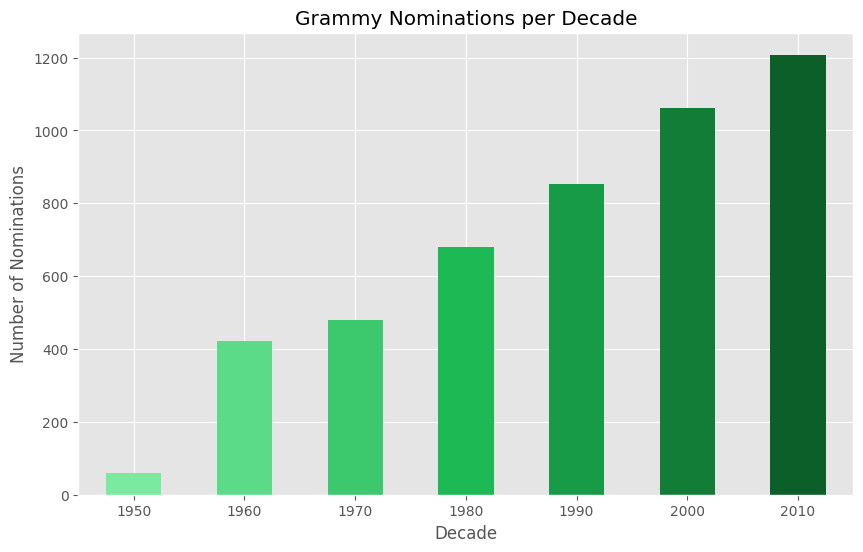

In [54]:
plt.figure(figsize=(10, 6))

nom_per_dec.plot(kind='bar', color=colours)

plt.title('Grammy Nominations per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Nominations')

plt.xticks(rotation = 0)

plt.show()

#### **Most Nominated Artists per Decade**

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\sebas\AppData\Local\Temp\ipykernel_7768\2533317574.py:15: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  bars = sns.barplot(x='decade',
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


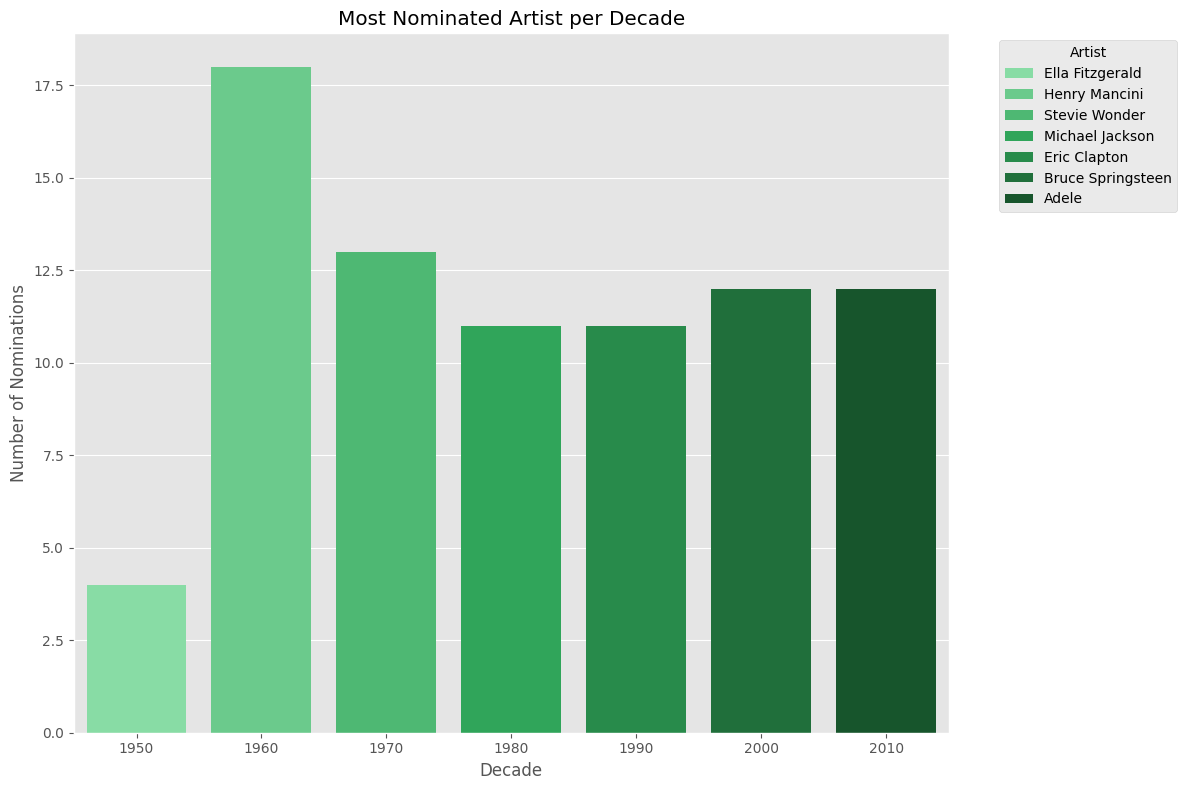

In [55]:
filtered_data_awards = data_awards[data_awards['artist'] != 'Various Artists']

most_nom_per_dec = (filtered_data_awards.groupby(['decade','artist'])
                    .size()
                    .reset_index(name='count')
                    .sort_values(['decade','count'], ascending=[True, False])
                    .groupby('decade')
                    .first()
                    .reset_index())

plt.figure(figsize=(12, 8))

colours = cmap(np.linspace(0, 1, len(most_nom_per_dec)))

bars = sns.barplot(x='decade',
            y='count',
            hue='artist',
            data=most_nom_per_dec,
            palette=colours)

plt.title('Most Nominated Artist per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Nominations')
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [56]:
most_nom_per_dec.head()

,decade,artist,count
0,1950,Ella Fitzgerald,4
1,1960,Henry Mancini,18
2,1970,Stevie Wonder,13
3,1980,Michael Jackson,11
4,1990,Eric Clapton,11


#### **Most Nominated Artists**

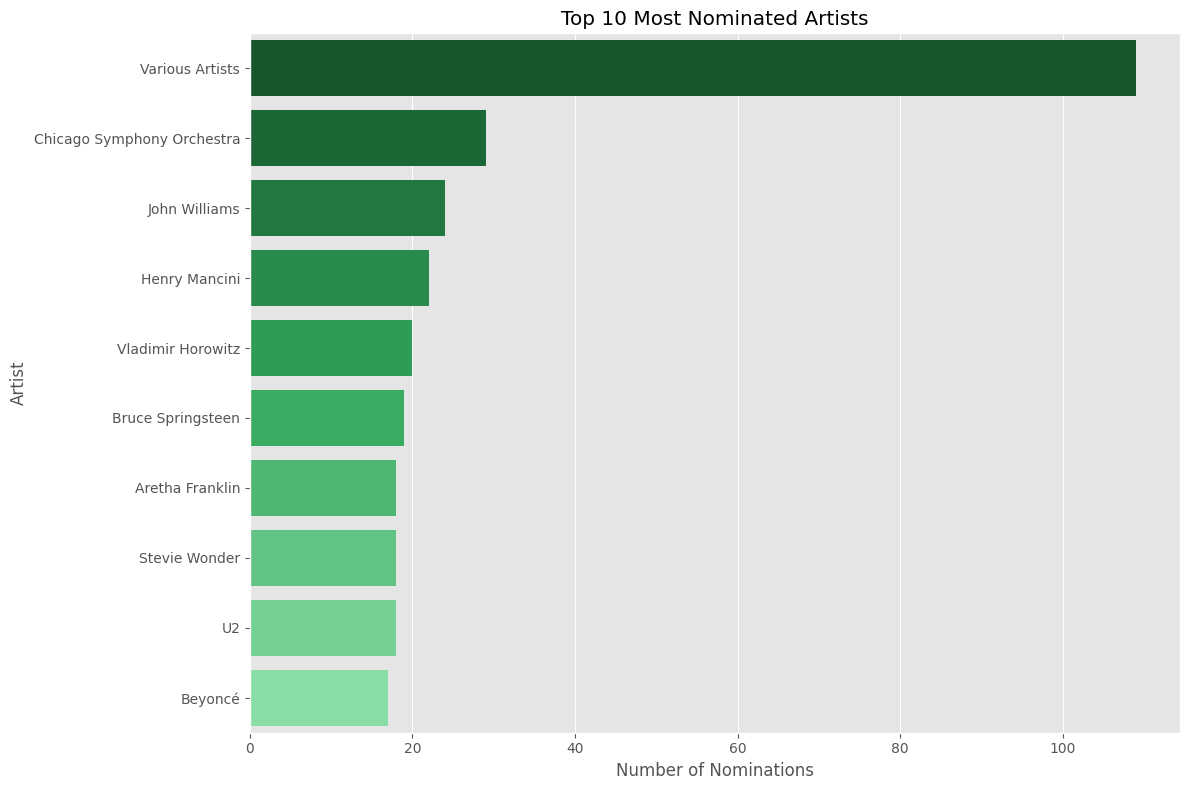

In [57]:
nominated_artists = data_awards['artist'].value_counts().head(10)

plt.figure(figsize=(12, 8))

colours = list(cmap(np.linspace(1, 0, len(nominated_artists))))

sns.barplot(
    x=nominated_artists.values, 
    y=nominated_artists.index, 
    hue=nominated_artists.index,
    palette=colours, 
    legend=False
)

plt.title('Top 10 Most Nominated Artists')
plt.xlabel('Number of Nominations')
plt.ylabel('Artist')

plt.tight_layout()
plt.show()


### **Key Insights and Conclusions**

The exploratory data analysis of the Grammy Awards dataset provides several concise insights into nomination trends, based on data cleaning, transformation, and visualisations.

#### **Data Cleaning and Transformation**
1. **Column Removal**: I removed unnecessary columns like `img`, `updated_at`, and `published_at` to streamline the dataset, as they were irrelevant to the analysis.
2. **Renaming Columns**: I renamed the `winner` column to `is_winner` for clarity, retaining it to track nomination outcomes.
3. **Handling Missing Values**: I dropped 5 rows with missing `nominee` values and removed 1,614 rows where both `artist` and `workers` were null, particularly in classical categories. I also dropped the `workers` column after extracting relevant artist information.
4. **Artist Extraction**: I filled missing `artist` values by identifying patterns in the `workers` column (e.g., standalone names, semicolons, role designations like artist, composer, conductor), reducing null `artist` values from 2,191 to 0.
5. **Data Transformation**: I standardised the `artist` column by replacing '(Various Artists)' with 'Various Artists' for consistency. I also created a `decade` column by grouping `year` into decades (e.g., 1950s, 1960s) to enable temporal analysis.

#### **Key Insights**

##### **Nomination Trends**
1. **Nominations Over Time**: The "_Grammy Nominations per Decade_" bar chart shows a steady increase in nominations, from fewer than 100 in the 1950s to over 1,200 in the 2010s, reflecting the Grammy Awards' expansion in categories and genres.
2. **Peak Decade**: The 2010s had the highest number of nominations (over 1,200), likely due to a significant reorganisation of Grammy categories in 2011–2012, which streamlined the awards and increased nominee diversity.

##### **Artist Analysis**
1. **Top Nominated Artists**: The "_Top 10 Most Nominated Artists_" bar chart reveals that "Various Artists" (collaborative/compilation albums) leads with over 100 nominations, followed by the Chicago Symphony Orchestra and John Williams, each with around 60–70 nominations. Artists like Henry Mancini, Vladimir Horowitz, Bruce Springsteen, Aretha Franklin, Stevie Wonder, U2, and Beyoncé also feature, with 20–50 nominations, showcasing diversity across classical, pop, rock, and R&B.
2. **Most Nominated per Decade**: The "_Most Nominated Artist per Decade_" bar chart highlights shifts in artist dominance:
   - `1950s`: Ella Fitzgerald (around 5 nominations).
   - `1960s`: Henry Mancini (around 17 nominations).
   - `1970s`: Stevie Wonder (around 12 nominations).
   - `1980s`: Michael Jackson (around 12 nominations).
   - `1990s`: Eric Clapton (around 11 nominations).
   - `2000s`: Bruce Springsteen (around 11 nominations).
   - `2010s`: Adele (around 11 nominations).
   This reflects evolving musical trends, from jazz/classical to pop/rock and modern pop.

##### **Visualisation Techniques**
1. **Temporal Trends**: The "_Grammy Nominations per Decade_" bar chart uses a gradient of Spotify greens to illustrate the growth in nominations over decades, making the upward trend visually clear.
2. **Artist Comparisons**: The "_Top 10 Most Nominated Artists_" bar chart employs a horizontal layout with a green gradient to rank artists by nomination count, highlighting the dominance of "Various Artists".
3. **Decadal Leaders**: The "_Most Nominated Artist per Decade_" bar chart uses distinct colours for each artist, paired with a legend, to show the leading artist per decade, effectively illustrating shifts in musical influence over time.

#### **Business Implications**
1. **Award Show Strategy**: The steady increase in nominations, peaking in the 2010s, suggests that the Grammys should continue expanding and refining categories to reflect evolving music trends, ensuring broader representation.
2. **Artist Promotion**: Artists like Adele, Bruce Springsteen, and Beyoncé, who dominate recent decades, can be leveraged for marketing and viewership, as their nomination history indicates strong fan appeal.
3. **Genre Focus**: The shift from classical/jazz to pop/rock and modern pop highlights the need to prioritise contemporary genres in nominations to align with audience preferences.
4. **Collaborative Projects**: The high nomination count for "Various Artists" suggests that collaborative or compilation albums resonate strongly, and the Grammys could promote such projects to boost engagement.
5. **Historical Recognition**: Recognising artists like Ella Fitzgerald and Henry Mancini in historical contexts can appeal to older audiences, balancing the focus on modern artists.

#### **Conclusion**
This analysis of 3,191 Grammy Awards entries reveals a steady growth in nominations from the 1950s to the 2010s, peaking at over 1,200 in the 2010s following a category reorganisation in 2011–2012. "Various Artists" leads overall nominations, while artists like Henry Mancini, Stevie Wonder, and Adele dominate specific decades, reflecting shifts in musical influence from jazz/classical to pop/rock and modern pop. These insights guide award show strategies, artist promotion, and genre focus, highlighting the evolving landscape of the Grammy Awards.